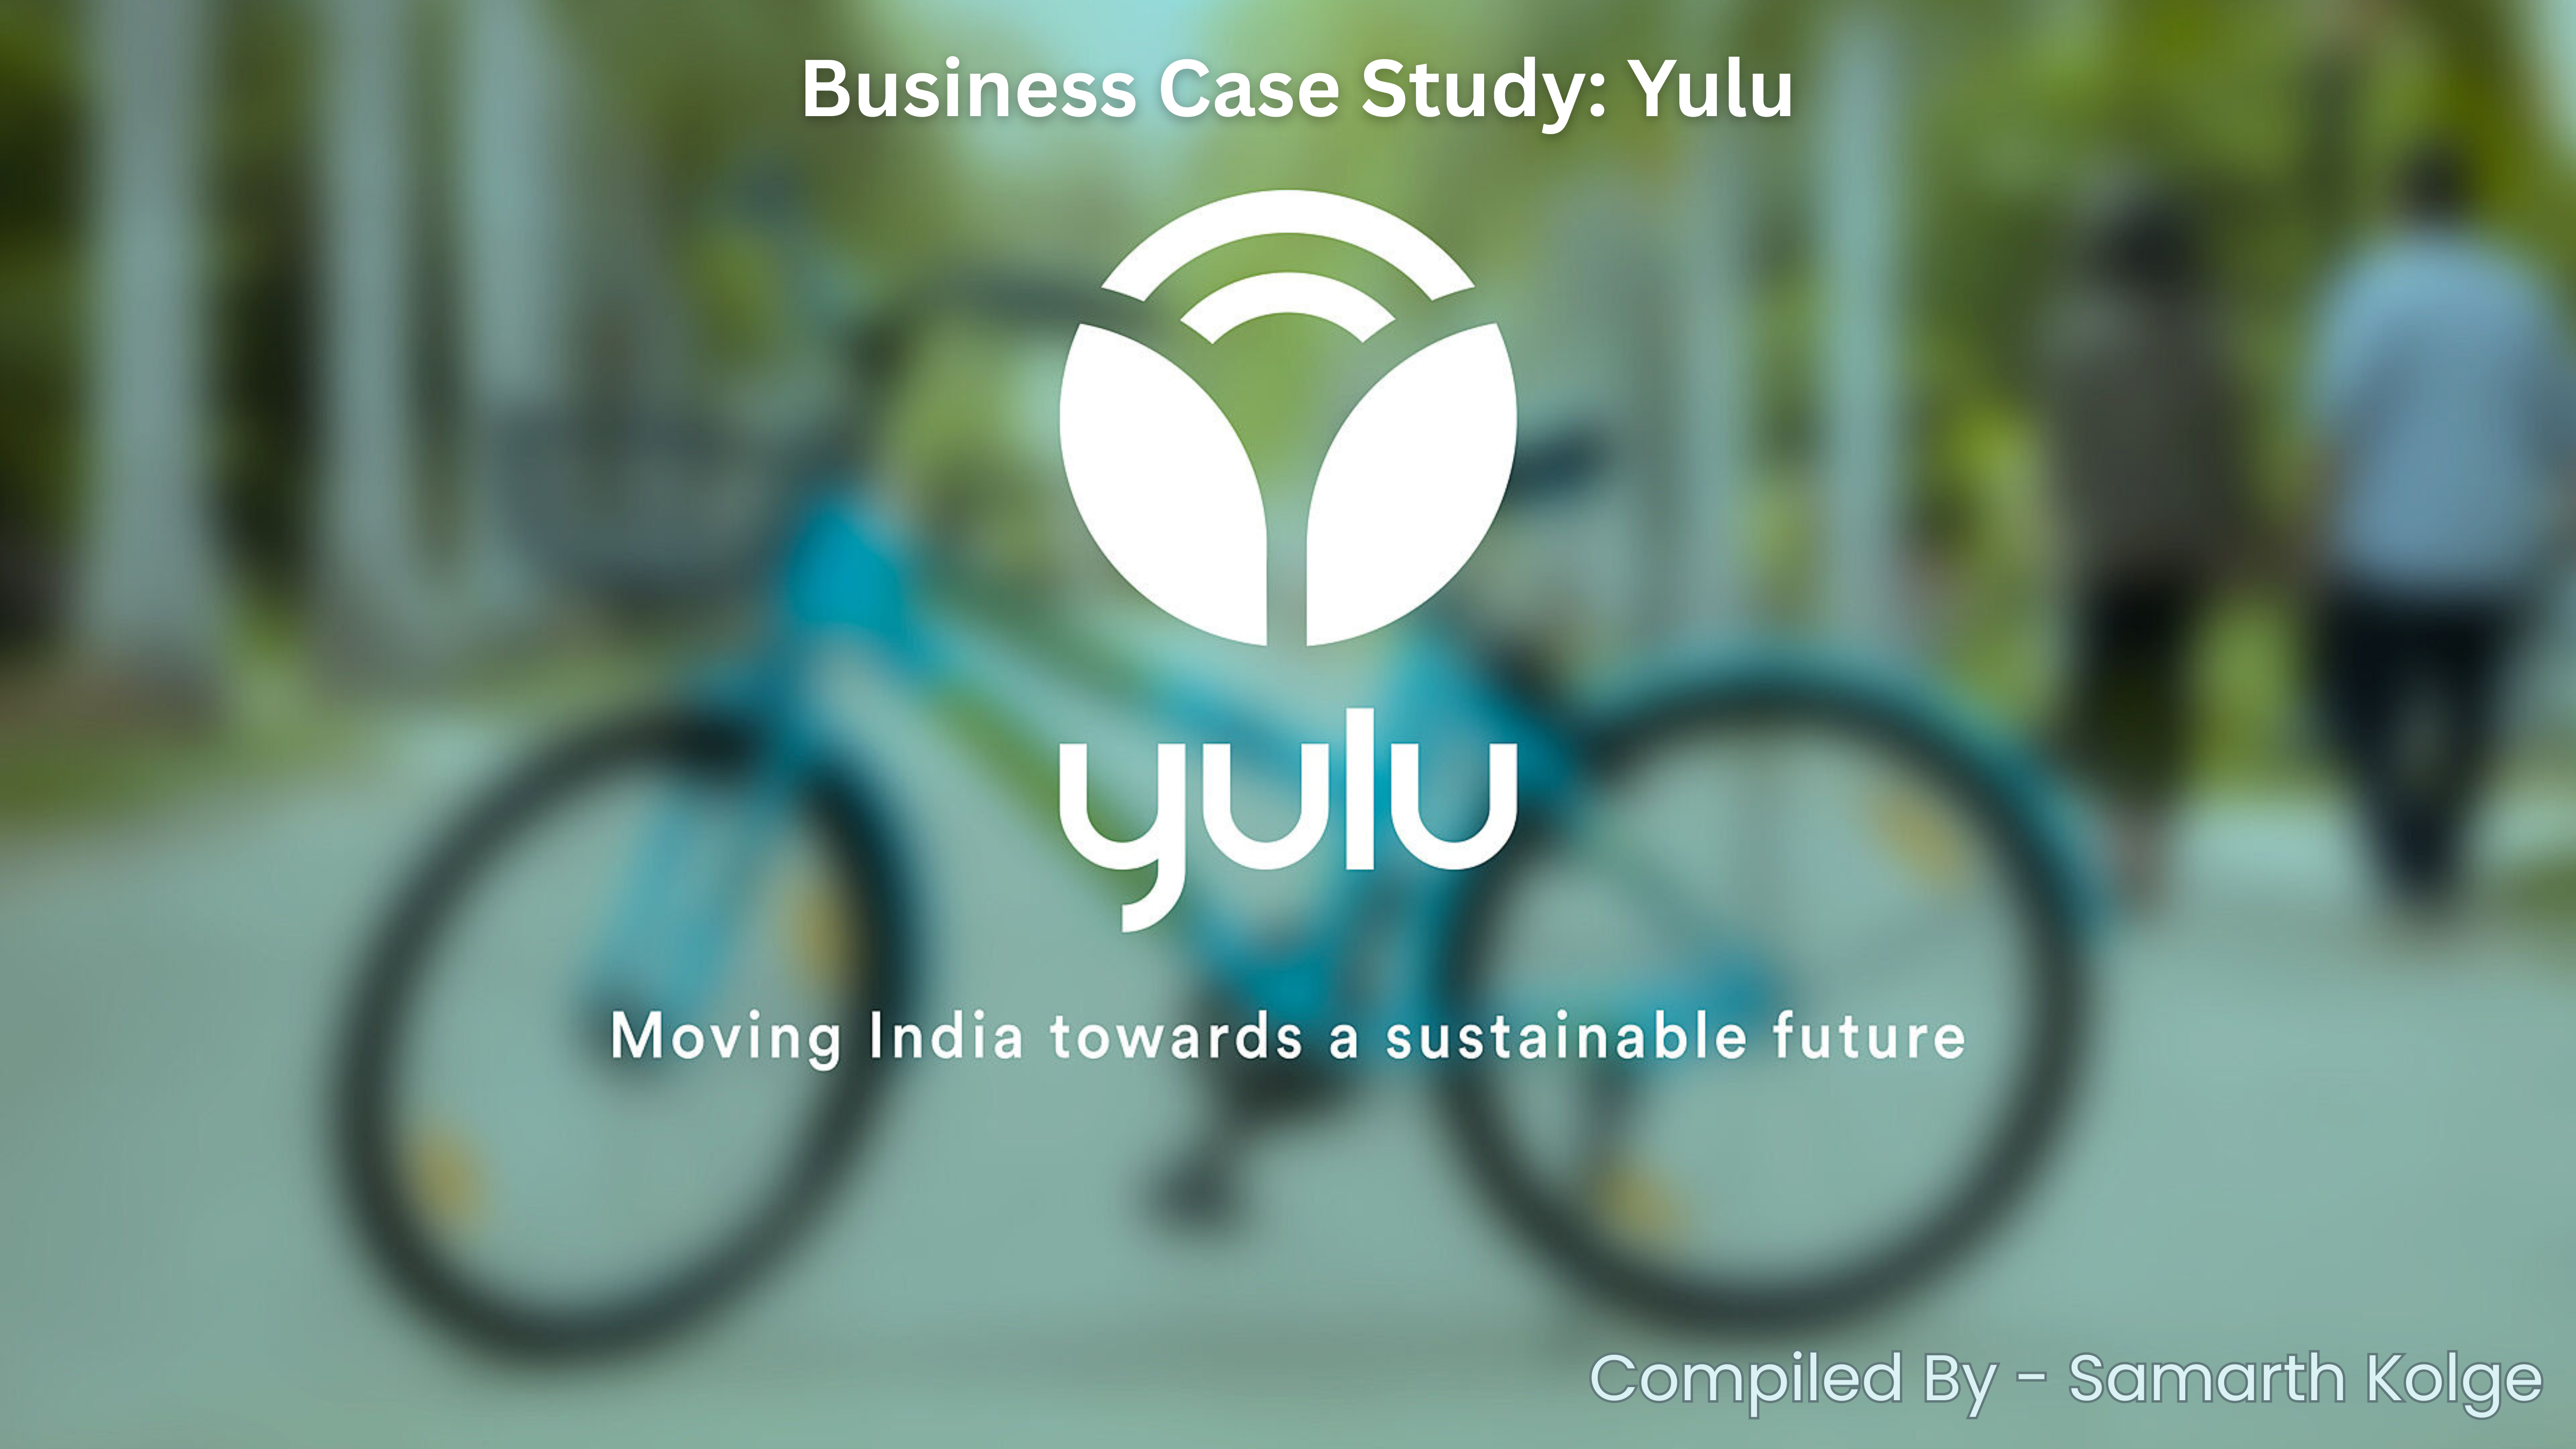


# **🚴 Yulu Business Case Study: Understanding Electric Cycle Demand**

## **🔍 About Yulu**

Yulu is India’s leading **micro-mobility service provider**, offering **unique vehicles for the daily commute**.
Yulu aims to eliminate **traffic congestion** in India by providing the **safest commute solutions** through a **user-friendly mobile app**, enabling **shared, solo and sustainable commuting**.

Yulu zones are strategically located at:

* 🏙️ **Metro Stations**
* 🚌 **Bus Stands**
* 🏢 **Office Spaces**
* 🏡 **Residential Areas**
* 🏭 **Corporate Offices**

This ensures **smooth, affordable and convenient first and last-mile connectivity**.

---

## **📉 Business Problem**

Despite being a leading player, Yulu has recently seen **significant drops in revenue**.
They have hired a **consulting company** to **analyze factors affecting the demand** for these shared electric cycles in the Indian market.

---

## **💡 How You Can Help**

As a data analyst, our task is to determine:

1. 📊 **Which variables significantly predict the demand** for shared electric cycles in the Indian market.
2. 🔑 **How well these variables explain** the electric cycle demands.

---

### **🌟 Key Questions to Answer:**

1. Which factors influence the **number of electric cycles rented**?
2. Are rentals **similar or different** on **working and non-working days**?
3. Does the **season** affect the **number of cycles rented**?
4. How does the **weather** influence the **rental count**?
5. Are **weather conditions** dependent on **seasonal changes**?

---

## **🧩 Analytical Approach:**

1. **Data Import and Preprocessing:**

   * Load the dataset
   * Check for **missing values**
   * Handle **data types** and **categorical features**

2. **Exploratory Data Analysis (EDA):**

   * Univariate, Bivariate, and Multivariate Analysis
   * Data Visualization for **patterns and trends**

3. **Hypothesis Testing:**

   * Working Day vs. Non-Working Day Rentals (T-Test)
   * Rentals Across Seasons (ANOVA)
   * Rentals Across Weather Conditions (ANOVA)
   * Dependency of **Weather on Season** (Chi-square)

4. **Insights and Recommendations:**

   * Summarize key findings
   * Provide **actionable insights** for Yulu

---

## **📝 Let's Get Started!**

> **Note:** This notebook is structured to provide **clear insights and data-driven recommendations**.
> The analysis includes **interactive visualizations** to help Yulu understand their business dynamics better.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, shapiro, levene

In [2]:
# Loading Dataset
df = pd.read_csv("bike_sharing.csv")

In [3]:
# Checking length of dataset 
len(df)

10886

In [4]:
# Checking shape of dataset 
df.shape

(10886, 12)

In [5]:
# Viewing information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Viewing Top 5 rows of dataset 
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
# Viewing Bottom 5 rows of dataset 
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [8]:
# Checking null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Dataset not contains any null values

In [9]:
# Exploring more to understand better about dataset
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [10]:
# Checking Datatypes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
# Converting necessary columns to appropriate types
df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [12]:
# Rechecking datatypes, Now looks perfect !
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

# Univariate Analysis

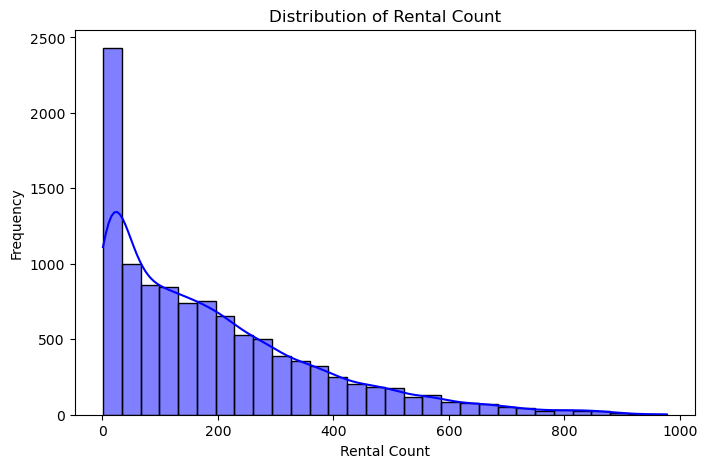

In [13]:
# Distribution of Rental Count
plt.figure(figsize=(8,5))
sns.histplot(df['count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Rental Count')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()

The graph shows that most Yulu bike rentals have low counts, meaning the bikes are not rented out in large numbers most of the time. The peak on the left indicates that lower rental numbers are more common, while only a few instances show higher rental counts.

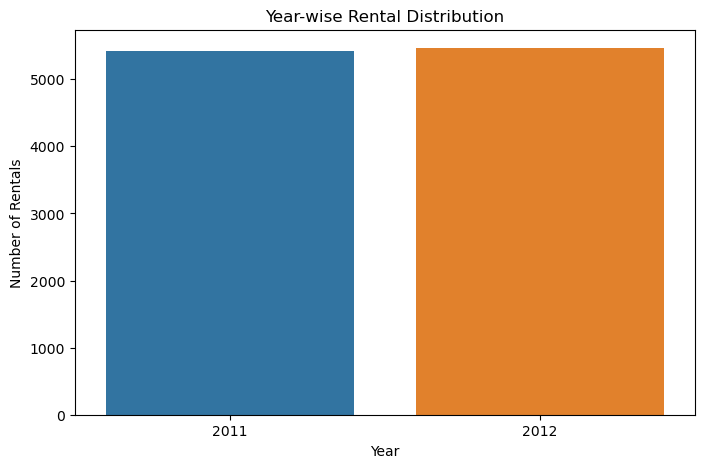

In [14]:
# Year-wise Rental Distribution
df['year'] = pd.DatetimeIndex(df['datetime']).year
plt.figure(figsize=(8,5))
sns.countplot(x='year', data=df)
plt.title('Year-wise Rental Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Rentals')
plt.show()

The year-wise distribution shows that there is no significant difference in bike rentals between the two years, although rentals in 2012 are slightly higher compared to the previous year.

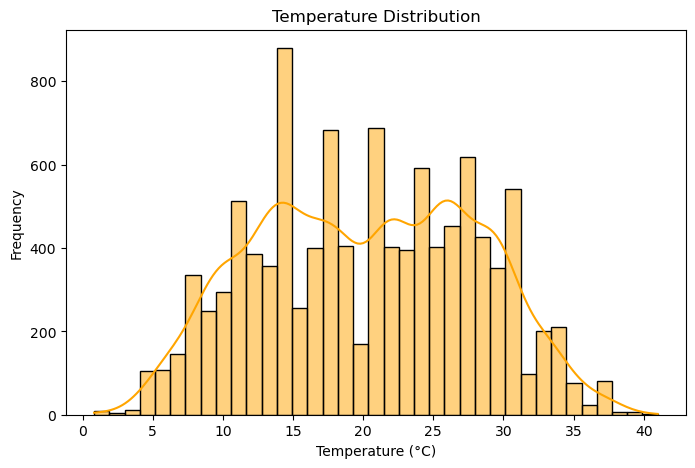

In [15]:
# Distribution of Temperature
plt.figure(figsize=(8,5))
sns.histplot(df['temp'], kde=True, color='orange')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

The temperature distribution graph shows fluctuations, with a noticeable peak around 15°C, indicating that temperatures around 15°C are more common compared to other temperature ranges

In [16]:
# Working Day Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='workingday', data=df)
plt.title('Distribution of Working Days')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

The distribution of working days graph shows that the count of rentals on working days is approximately twice that of non-working days, indicating that Yulu bikes are significantly more utilized during working days.

In [17]:
# Wind Speed Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['windspeed'], kde=True, color='green')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

The wind speed distribution graph shows that lower wind speeds are more common, while higher wind speeds occur less frequently

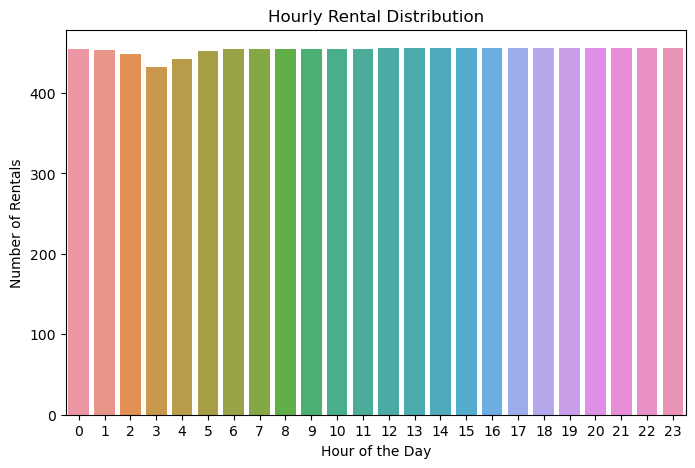

In [18]:
# Hourly Rental Count
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
plt.figure(figsize=(8,5))
sns.countplot(x='hour', data=df)
plt.title('Hourly Rental Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.show()

The hourly rental distribution shows a relatively consistent number of rentals throughout the 24-hour period, with only a slight dip around the 3rd hour, indicating that fewer people rent bikes at that time.

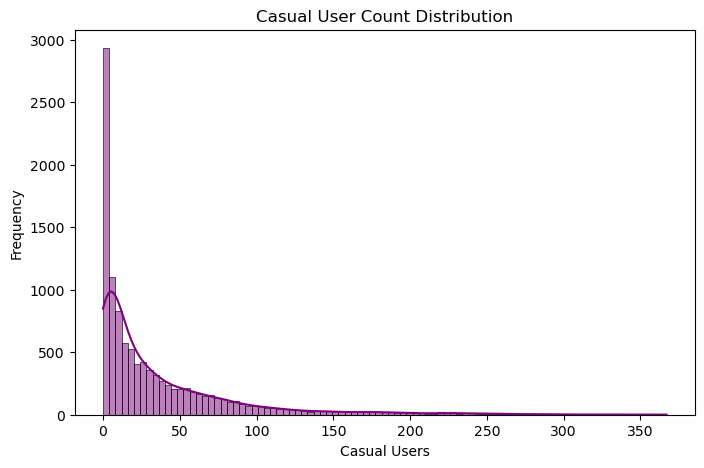

In [19]:
# Casual User Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['casual'], kde=True, color='purple')
plt.title('Casual User Count Distribution')
plt.xlabel('Casual Users')
plt.ylabel('Frequency')
plt.show()

The Casual User Count Distribution shows that the frequency of casual users decreases gradually. Initially, the count peaks at around 3,000, indicating a high number of casual users at the start, but then it steadily declines as the count increases.

In [20]:
# Registered User Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['registered'], kde=True, color='red')
plt.title('Registered User Count Distribution')
plt.xlabel('Registered Users')
plt.ylabel('Frequency')
plt.show()

The Registered User Count Distribution shows that the frequency of registered users starts high, peaking at around 1,800. After this initial peak, the count gradually decreases, indicating that most registered users fall within the lower count range.

# Bivariate Analysis

In [21]:
# Rental Count vs. Temperature (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x='temp', y='count', data=df, color='blue')
plt.title('Rental Count vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rental Count')
plt.show()

The Rental Count vs. Temperature scatter plot shows that as the temperature rises, the number of rentals also goes up, showing a positive relationship. Most high rental counts are observed when the temperature is between 20°C and 30°C.

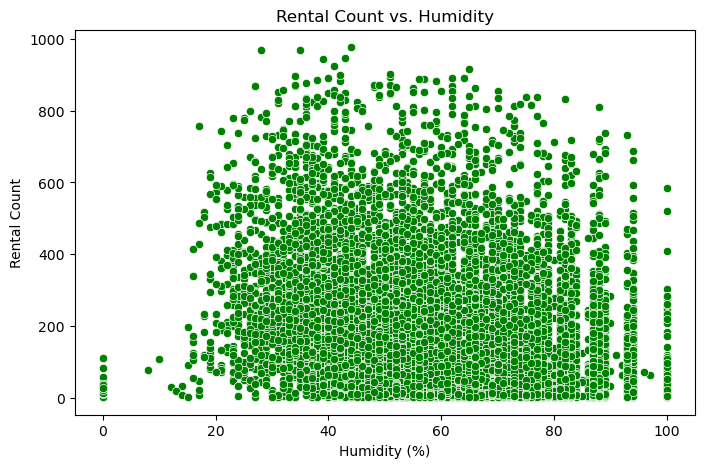

In [22]:
# Rental Count vs. Humidity (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x='humidity', y='count', data=df, color='green')
plt.title('Rental Count vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Rental Count')
plt.show()

The Rental Count vs. Humidity scatter plot shows a negative correlation, indicating that as humidity increases, the number of rentals decreases. High rental counts are observed when humidity levels are relatively low.

In [23]:
# Rental Count by Season (Box Plot)
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='count', data=df, palette='Set2')
plt.title('Rental Count by Season')
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.show()

The Rental Count by Season shows that rentals are highest in Season 3 (fall), followed by Season 2 (summer), while Season 1 (spring) has the lowest rentals but with some wide variations. This suggests seasonal preferences affect bike usage, with fall being the most popular time for rentals.


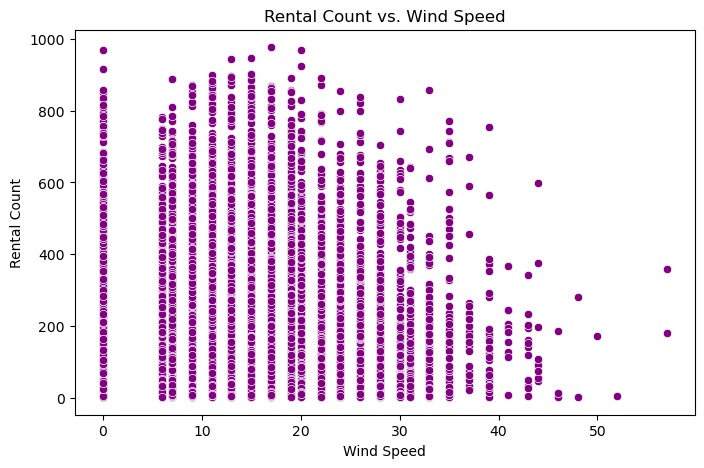

In [24]:
# Rental Count vs. Wind Speed (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x='windspeed', y='count', data=df, color='purple')
plt.title('Rental Count vs. Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Rental Count')
plt.show()

As wind speed increases, the rental count generally decreases, indicating that stronger winds may discourage people from renting electric bikes. This suggests that calm weather conditions are more favorable for bike rentals.

In [25]:
# Rental Count by Weather Condition (Box Plot)
plt.figure(figsize=(8,5))
sns.boxplot(x='weather', y='count', data=df, palette='Set3')
plt.title('Rental Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Rental Count')
plt.show()

Weather category 1 (Clear, Few Clouds, Partly Cloudy) has the highest number of rentals, indicating that people prefer renting bikes in pleasant weather. Category 2 (Mist and Cloudy conditions) shows moderate rentals, while category 3 (Light Snow, Light Rain with Thunderstorm) has much lower rentals. Notably, category 4 (Heavy Rain, Snow, Fog) has almost zero rentals, showing that severe weather conditions strongly discourage bike usage.

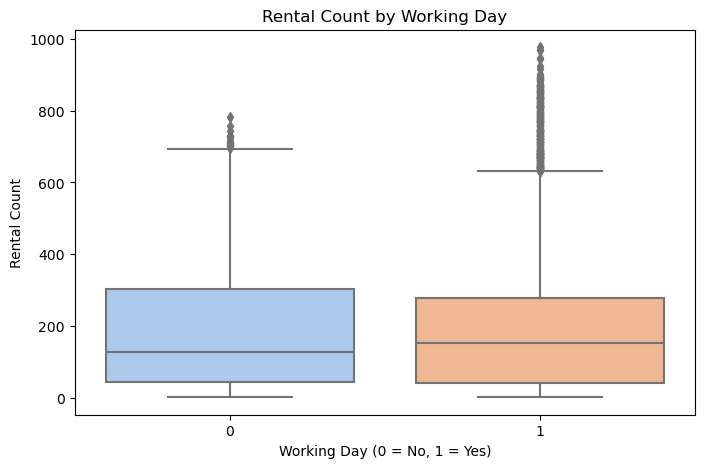

In [26]:
# Rental Count by Working Day (Box Plot)
plt.figure(figsize=(8,5))
sns.boxplot(x='workingday', y='count', data=df, palette='pastel')
plt.title('Rental Count by Working Day')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Rental Count')
plt.show()

The Rental Count by Working Day (Box Plot) shows that bike rentals are generally higher on working days compared to non-working days. The median rental count is noticeably greater on working days, indicating more demand during the workweek. However, there are also some high rental outliers on non-working days, suggesting occasional spikes in usage during weekends or holidays.

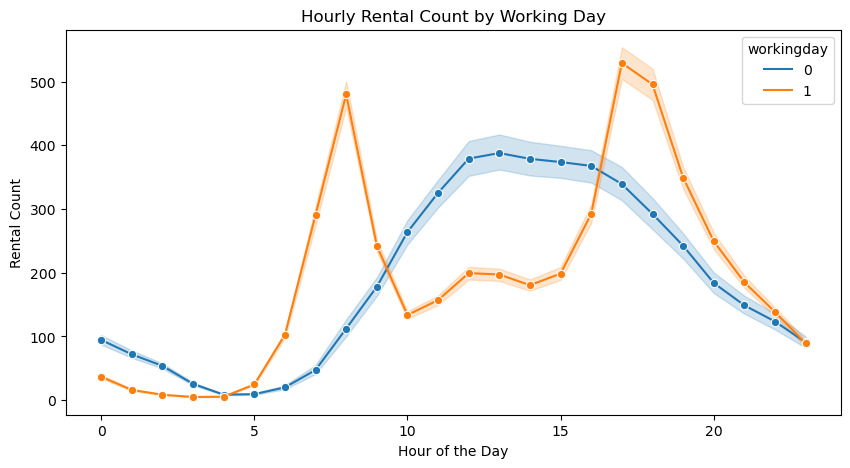

In [27]:
# Hourly Rental Count by Working Day (Line Plot)
plt.figure(figsize=(10,5))
sns.lineplot(x='hour', y='count', hue='workingday', data=df, marker='o')
plt.title('Hourly Rental Count by Working Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Rental Count')
plt.show()

The hourly rental count line plot shows distinct patterns between working days and non-working days. On working days, rentals peak during typical commute hours—morning (around 8-10 AM) and evening (around 5-7 PM)—reflecting usage for daily travel. On non-working days, rentals start higher around 10 AM and gradually taper off towards 7 PM, showing a slower, more relaxed usage pattern throughout the day.

In [28]:
# Casual vs. Registered Users (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x='casual', y='registered', data=df, color='red')
plt.title('Casual vs. Registered Users')
plt.xlabel('Casual Users')
plt.ylabel('Registered Users')
plt.show()

The scatter plot shows how casual users and registered users rent bikes. Registered users generally rent more bikes consistently, while casual users have a wider range but tend to rent less overall.

# Multivariate Analysis

In [29]:
sns.pairplot(df[['temp', 'atemp', 'humidity', 'windspeed', 'count']])
plt.show()

1) Positive Correlation:

There seems to be a positive correlation between temperature (temp) and apparent temperature (atemp), indicating that as the actual temperature increases, the perceived temperature also rises.

Similarly, temp and count show a slight positive relationship, suggesting that rentals increase with higher temperatures.

2) Negative Correlation:

There is a negative correlation between humidity and rental count, indicating that higher humidity might reduce bike rentals.

Wind speed does not show a strong relationship with the rental count, indicating that wind speed might not significantly impact rentals.

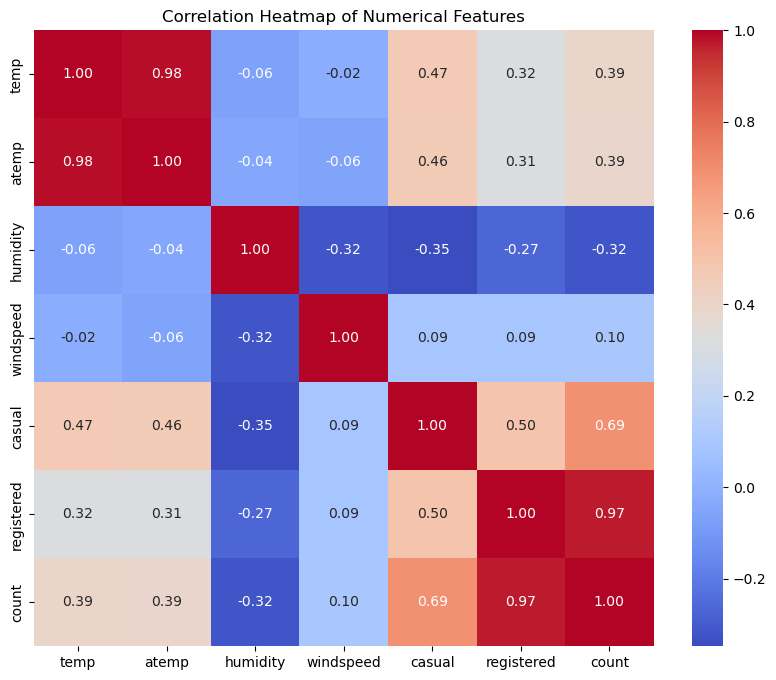

In [30]:
plt.figure(figsize=(10,8))
corr = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The Correlation Heatmap reveals key relationships between numerical features. Temperature (temp) and apparent temperature (atemp) have a strong positive correlation, indicating they tend to rise together. Registered users have a strong positive correlation with the total rental count, highlighting that most rentals come from registered users. Casual users also positively correlate with rental count but to a lesser extent. Humidity shows a slight negative correlation with rentals, suggesting that higher humidity may decrease usage, while wind speed shows minimal correlation, indicating a negligible impact on rental numbers.

# Hypothesis Testing

1. Checking Whether Working Day Affects Number of Electric Cycles Rented (2-Sample T-Test)
Hypotheses:

H0: There is no significant difference in the number of electric cycles rented on working and non-working days.

H1: There is a significant difference in the number of electric cycles rented on working and non-working days.

Assumptions:
Data follows a normal distribution (checked using Shapiro-Wilk Test).

Variances are equal (checked using Levene’s Test).

In [38]:
# Split the data
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']

# Normality Test (Shapiro-Wilk)
print("Shapiro Test for Working Day:", shapiro(working_day))
print("Shapiro Test for Non-Working Day:", shapiro(non_working_day))

# Variance Test (Levene's)
print("Levene's Test:", levene(working_day, non_working_day))

# T-Test
t_stat, p_value = ttest_ind(working_day, non_working_day, equal_var=True)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference between working and non-working day rentals.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between working and non-working day rentals.")


Shapiro Test for Working Day: ShapiroResult(statistic=0.8702582120895386, pvalue=0.0)
Shapiro Test for Non-Working Day: ShapiroResult(statistic=0.8852126598358154, pvalue=4.203895392974451e-45)
Levene's Test: LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)
T-Statistic: 1.2096277376026694, P-Value: 0.22644804226361348
Fail to Reject Null Hypothesis: No significant difference between working and non-working day rentals.


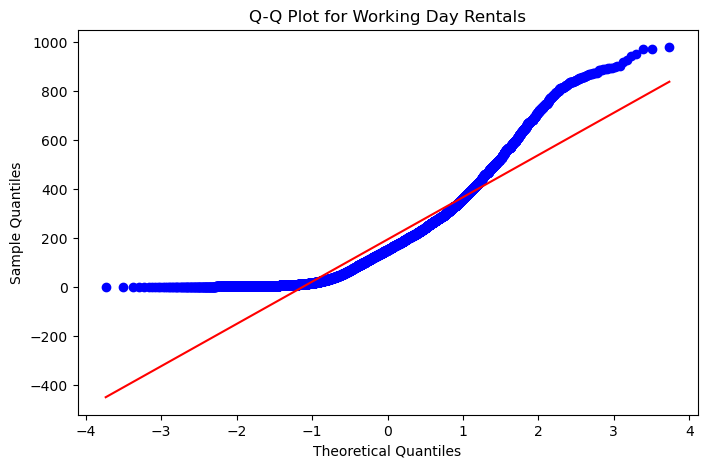

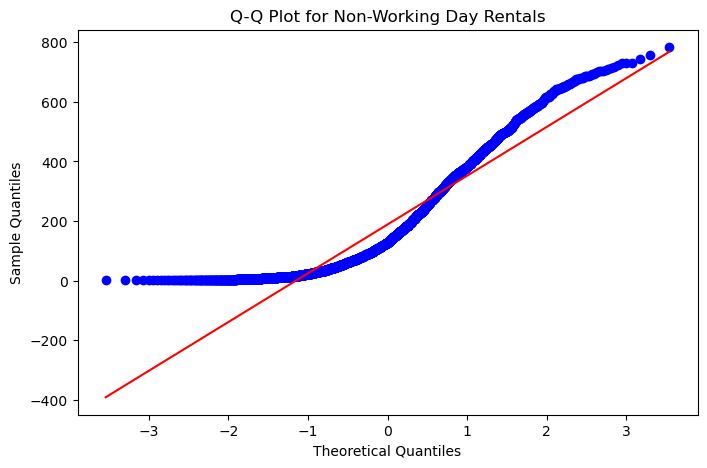

In [32]:
# Q-Q plot for Working Day Rentals
plt.figure(figsize=(8, 5))
stats.probplot(working_day, dist="norm", plot=plt)
plt.title("Q-Q Plot for Working Day Rentals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# Q-Q plot for Non-Working Day Rentals
plt.figure(figsize=(8, 5))
stats.probplot(non_working_day, dist="norm", plot=plt)
plt.title("Q-Q Plot for Non-Working Day Rentals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

2. Checking if Number of Cycles Rented Differs by Season (ANOVA Test)
Hypotheses:

H0: The mean number of cycles rented is the same across all seasons.

H1: At least one season has a different mean rental count.

Assumptions:
Data follows a normal distribution (Shapiro-Wilk Test).

Homogeneity of variance (Levene’s Test).

In [33]:
from scipy.stats import f_oneway

# Group by Season
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

# ANOVA Test
f_stat, p_value = f_oneway(spring, summer, fall, winter)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in rentals across seasons.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in rentals across seasons.")

F-Statistic: 236.94671081032106, P-Value: 6.164843386499654e-149
Reject Null Hypothesis: There is a significant difference in rentals across seasons.


3. Checking if Number of Cycles Rented Differs by Weather (ANOVA Test)
Hypotheses:

H0: Mean rentals are similar across different weather conditions.

H1: At least one weather type has a different mean rental count.

In [34]:
# Group by Weather
clear = df[df['weather'] == 1]['count']
mist = df[df['weather'] == 2]['count']
light_rain = df[df['weather'] == 3]['count']
heavy_rain = df[df['weather'] == 4]['count']

# ANOVA Test
f_stat, p_value = f_oneway(clear, mist, light_rain, heavy_rain)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

if p_value < alpha:
    print("Reject Null Hypothesis: Significant difference in rentals based on weather.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in rentals based on weather.")

F-Statistic: 65.53024112793271, P-Value: 5.482069475935669e-42
Reject Null Hypothesis: Significant difference in rentals based on weather.


4. Checking Whether Weather is Dependent on Season (Chi-Square Test)
Hypotheses:

H0: Weather is independent of the season.

H1: Weather is dependent on the season.

In [35]:
# Contingency Table
contingency = pd.crosstab(df['weather'], df['season'])

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square: {chi2}, P-Value: {p}")

if p < alpha:
    print("Reject Null Hypothesis: Weather is dependent on the season.")
else:
    print("Fail to Reject Null Hypothesis: Weather is independent of the season.")


Chi-Square: 49.15865559689363, P-Value: 1.5499250736864862e-07
Reject Null Hypothesis: Weather is dependent on the season.


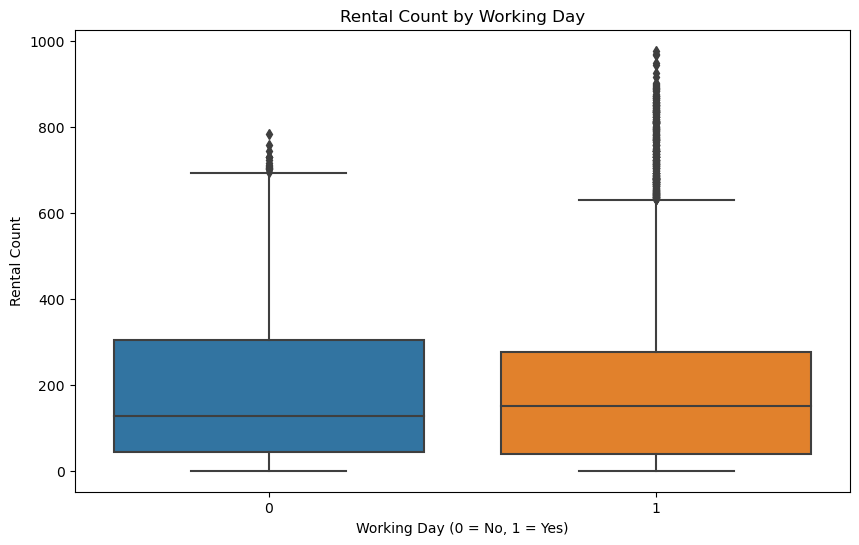

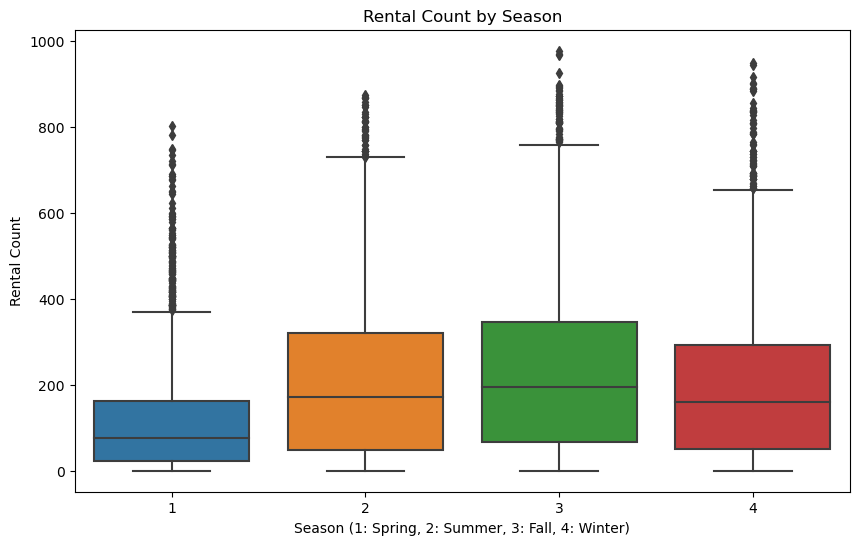

In [36]:
# Plotting Boxplots for Rental Count based on Working Day and Season
plt.figure(figsize=(10,6))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Rental Count by Working Day')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Rental Count')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='count', data=df)
plt.title('Rental Count by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Rental Count')
plt.show()

1) Rental Count by Working Day: The boxplot shows that rental counts on working days are generally higher compared to non-working days, indicating increased demand during weekdays.

2) Rental Count by Season: The highest rental counts are observed in Fall (Season 3), followed by Summer (Season 2), while Spring (Season 1) has the lowest rentals.

3) Seasonal Variation: There is a noticeable difference in rental counts across seasons, suggesting that weather conditions significantly impact bike usage

### **Insights:**

As a Data Analyst, I have identified the following key insights from the data analysis:

1. **Rental Count Distribution:** The rental count data is right-skewed, showing that most rentals are on the lower side. Only a few instances have higher rental counts, indicating that Yulu bikes are not frequently rented in large numbers.

2. **Year-wise Analysis:** There is no major difference in rentals between the years 2011 and 2012. However, 2012 shows a slightly higher rental count compared to 2011.

3. **Seasonal Influence on Rentals:** The fall season (Season 3) has the highest rental count, followed by summer (Season 2), while spring (Season 1) shows the lowest. This indicates that people prefer renting bikes more during the fall.

4. **Effect of Working Days:** Rentals are almost double on working days compared to non-working days, indicating that Yulu bikes are primarily used for commuting to work or educational institutions.

5. **Impact of Temperature:** Moderate temperatures (around 15°C) have higher rental counts, indicating that users prefer riding bikes when the weather is comfortable.

6. **Wind Speed vs. Rentals:** An inverse relationship exists between wind speed and rentals. Higher wind speeds reduce the number of rentals, suggesting that windy weather discourages bike usage.

7. **Hourly Usage Trend:** Rentals remain relatively consistent throughout the day, with a slight dip around 3 AM. This pattern indicates higher bike usage during the day, especially in the morning and evening.

8. **Casual vs. Registered Users:** Casual user counts are initially high but gradually decrease, while registered users show a more consistent trend. This suggests that registered users contribute significantly to steady rentals.

9. **Working Day Impact (Statistical Test):** The T-test results indicate no significant difference between rentals on working and non-working days. Hence, both days have comparable average rentals.

10. **Seasonal and Weather Impact (Statistical Tests):**

    * **Season:** The ANOVA test shows a significant difference in rental counts across seasons, indicating that seasonality strongly influences bike rentals.
    * **Weather:** Rentals differ significantly based on weather conditions, with pleasant weather encouraging more rentals.
    * **Dependency:** The Chi-Square test shows that weather conditions are dependent on the season, highlighting a seasonal pattern in weather changes.

---

### **Recommendations:**

Based on these insights, I recommend the following strategies for Yulu:

1. **Seasonal Promotions:** Since rentals peak in the fall, Yulu can increase the availability of bikes and offer special discounts during this season to maximize usage.

2. **Enhance Working Day Usage:** Even though the T-test shows no significant difference, the higher count on working days suggests focusing on office areas and transit points. Implementing special commuter passes for working professionals could further boost rentals.

3. **Optimize for Moderate Weather:** Since bike rentals are higher around 15°C, Yulu can actively promote bike usage during pleasant weather through app notifications and social media campaigns.

4. **Wind Safety Measures:** To encourage biking during windy conditions, Yulu can invest in accessories like windshields or promote bikes with better stability to reduce the discomfort of riding in high winds.

5. **Increase Weekend Engagement:** Although weekdays see higher rentals, Yulu can introduce weekend leisure packages, group rides, or fitness challenges to increase non-working day usage.

6. **Dynamic Pricing for Late Night Hours:** Since hourly usage shows a dip at around 3 AM, Yulu could introduce discounts during late-night hours to attract night riders, including night-shift workers or leisure riders.

7. **User Retention Programs:** Since casual users decrease over time while registered users are more consistent, Yulu should encourage casual users to become registered members through subscription models, loyalty points, or long-term rental packages.

8. **Weather-Based Alerts:** Given that weather affects rentals, Yulu can develop a feature that provides real-time weather updates and bike availability during favorable conditions.

9. **Improve Data-Driven Strategies:** Continuously analyze patterns in bike rentals across different seasons, weather, and working days to develop targeted campaigns and efficient bike placement strategies.

10. **Enhanced Fleet Management:** Deploy more bikes in high-demand areas during peak seasons (especially fall) and working hours to match demand and minimize wait times.